In [25]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import neighbors, datasets

In [28]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [3]:
import matplotlib.pyplot as plt

In [4]:
X, y = make_blobs(n_samples=10000, n_features=2, centers=5, random_state=42, cluster_std=4)

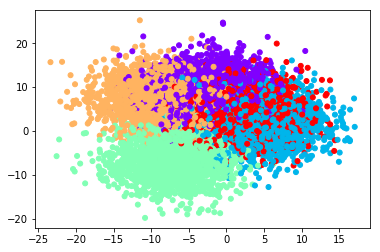

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow' )

### Standard Knn

In [6]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
print(f"Train: {np.bincount(y_train)}")
print(f"Test: {np.bincount(y_test)}")

Train: [1488 1484 1518 1488 1522]
Test: [512 516 482 512 478]


In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [10]:
knn_pred = knn.predict(X_test)

In [11]:
print(f"Pred: {np.bincount(knn_pred)}")

Pred: [506 469 490 524 511]


In [12]:
accuracy = accuracy_score(y_test, knn_pred)
f1_macro = f1_score(y_test, knn_pred, average='macro')
f1_micro = f1_score(y_test, knn_pred, average='micro')

In [13]:
print('Accuracy = {:.2f} %'.format(accuracy*100))
print('F1 macro = {:.2f}'.format(f1_macro*100))
print('F1 micro = {:.2f}'.format(f1_micro*100))

Accuracy = 59.92 %
F1 macro = 60.01
F1 micro = 59.92


### Bagging Knn

In [14]:
knn_bag = BaggingClassifier(knn, max_samples=0.4, max_features=1.0, random_state=42,
                           bootstrap_features=True)

In [15]:
knn_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance'),
         bootstrap=True, bootstrap_features=True, max_features=1.0,
         max_samples=0.4, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [16]:
knn_bag_pred = knn_bag.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, knn_bag_pred)
f1_macro = f1_score(y_test, knn_bag_pred, average='macro')
f1_micro = f1_score(y_test, knn_bag_pred, average='micro')

In [18]:
print('Accuracy = {:.2f} %'.format(accuracy*100))
print('F1 macro = {:.2f}'.format(f1_macro*100))
print('F1 micro = {:.2f}'.format(f1_micro*100))

Accuracy = 65.36 %
F1 macro = 65.24
F1 micro = 65.36


In [19]:
bag_sizes = [0.25, 0.5, 0.75, 1.0]
bag_count = [10, 20, 50, 100]

In [20]:
for bag_size in bag_sizes:
    for bags in bag_count:
        knn_bag = BaggingClassifier(knn, max_samples=bag_size, max_features=1.0, random_state=42,
                               bootstrap_features=True, n_estimators=bags)
        knn_bag.fit(X_train, y_train)
        knn_bag_pred = knn_bag.predict(X_test)
        accuracy = accuracy_score(y_test, knn_bag_pred)
        f1_macro = f1_score(y_test, knn_bag_pred, average='macro')
        f1_micro = f1_score(y_test, knn_bag_pred, average='micro')
        print(f'Bag count: {bags}')
        print(f'Bag size: {bag_size}')
        print('Accuracy = {:.2f} %'.format(accuracy*100))
        print('F1 macro = {:.2f}'.format(f1_macro*100))
        print('F1 micro = {:.2f}'.format(f1_micro*100))
        print('-------')

Bag count: 10
Bag size: 0.25
Accuracy = 63.96 %
F1 macro = 63.82
F1 micro = 63.96
-------
Bag count: 20
Bag size: 0.25
Accuracy = 65.44 %
F1 macro = 65.21
F1 micro = 65.44
-------
Bag count: 50
Bag size: 0.25
Accuracy = 65.48 %
F1 macro = 65.32
F1 micro = 65.48
-------
Bag count: 100
Bag size: 0.25
Accuracy = 66.00 %
F1 macro = 65.80
F1 micro = 66.00
-------
Bag count: 10
Bag size: 0.5
Accuracy = 64.84 %
F1 macro = 64.73
F1 micro = 64.84
-------
Bag count: 20
Bag size: 0.5
Accuracy = 64.92 %
F1 macro = 64.76
F1 micro = 64.92
-------
Bag count: 50
Bag size: 0.5
Accuracy = 65.00 %
F1 macro = 64.88
F1 micro = 65.00
-------
Bag count: 100
Bag size: 0.5
Accuracy = 65.08 %
F1 macro = 64.95
F1 micro = 65.08
-------
Bag count: 10
Bag size: 0.75
Accuracy = 63.68 %
F1 macro = 63.63
F1 micro = 63.68
-------
Bag count: 20
Bag size: 0.75
Accuracy = 63.56 %
F1 macro = 63.56
F1 micro = 63.56
-------
Bag count: 50
Bag size: 0.75
Accuracy = 63.16 %
F1 macro = 63.07
F1 micro = 63.16
-------
Bag count: 1

### Todo: Test the same stuff with real-world data

In [114]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, [0,2]]
y = iris.target

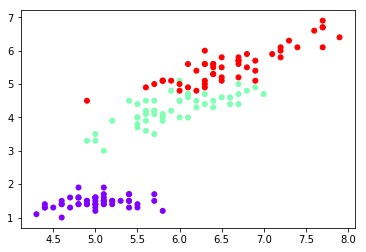

In [115]:
plt.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow' )

In [116]:
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [118]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, knn_pred)
f1_macro = f1_score(y_test, knn_pred, average='macro')
f1_micro = f1_score(y_test, knn_pred, average='micro')

In [120]:
print('Accuracy = {:.2f} %'.format(accuracy*100))
print('F1 macro = {:.2f}'.format(f1_macro*100))
print('F1 micro = {:.2f}'.format(f1_micro*100))

Accuracy = 92.11 %
F1 macro = 91.24
F1 micro = 92.11


In [103]:
bag_sizes = [0.25, 0.5, 0.75, 1.0]
bag_count = [10, 20, 50, 100]

In [104]:
for bag_size in bag_sizes:
    for bags in bag_count:
        knn_bag = BaggingClassifier(knn, max_samples=bag_size, max_features=1.0, random_state=42,
                               bootstrap_features=True, n_estimators=bags)
        knn_bag.fit(X_train, y_train)
        knn_bag_pred = knn_bag.predict(X_test)
        accuracy = accuracy_score(y_test, knn_bag_pred)
        f1_macro = f1_score(y_test, knn_bag_pred, average='macro')
        f1_micro = f1_score(y_test, knn_bag_pred, average='micro')
        print(f'Bag count: {bags}')
        print(f'Bag size: {bag_size}')
        print('Accuracy = {:.2f} %'.format(accuracy*100))
        print('F1 macro = {:.2f}'.format(f1_macro*100))
        print('F1 micro = {:.2f}'.format(f1_micro*100))
        print('-------')

Bag count: 10
Bag size: 0.25
Accuracy = 100.00 %
F1 macro = 100.00
F1 micro = 100.00
-------
Bag count: 20
Bag size: 0.25
Accuracy = 94.74 %
F1 macro = 94.10
F1 micro = 94.74
-------
Bag count: 50
Bag size: 0.25
Accuracy = 97.37 %
F1 macro = 97.08
F1 micro = 97.37
-------
Bag count: 100
Bag size: 0.25
Accuracy = 97.37 %
F1 macro = 97.08
F1 micro = 97.37
-------
Bag count: 10
Bag size: 0.5
Accuracy = 94.74 %
F1 macro = 94.10
F1 micro = 94.74
-------
Bag count: 20
Bag size: 0.5
Accuracy = 97.37 %
F1 macro = 97.08
F1 micro = 97.37
-------
Bag count: 50
Bag size: 0.5
Accuracy = 97.37 %
F1 macro = 97.08
F1 micro = 97.37
-------
Bag count: 100
Bag size: 0.5
Accuracy = 97.37 %
F1 macro = 97.08
F1 micro = 97.37
-------
Bag count: 10
Bag size: 0.75
Accuracy = 94.74 %
F1 macro = 94.19
F1 micro = 94.74
-------
Bag count: 20
Bag size: 0.75
Accuracy = 94.74 %
F1 macro = 94.19
F1 micro = 94.74
-------
Bag count: 50
Bag size: 0.75
Accuracy = 94.74 %
F1 macro = 94.19
F1 micro = 94.74
-------
Bag count

In [49]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [75]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [76]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

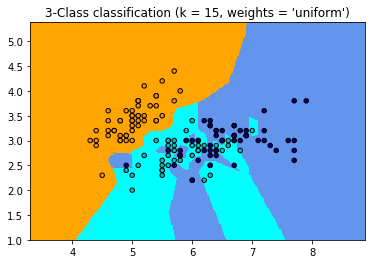

In [69]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'uniform'))

plt.show()

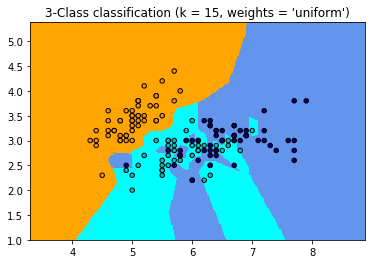

In [77]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'uniform'))

plt.show()

In [31]:
#ax1=plt.subplot(2, 2, 1)
#ax2=plt.subplot(222, frameon=False)
#plt.subplot(223, projection='polar')

# Real World Data

In [4]:
df_breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)

In [5]:
df_breast_cancer = df_breast_cancer[df_breast_cancer[6] != '?']

In [6]:
y = df_breast_cancer[10]

In [7]:
X = df_breast_cancer[[0,1,2,3,4,5,6,7,8,9]]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [60]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, knn_pred)
f1_macro = f1_score(y_test, knn_pred, average='macro')
f1_micro = f1_score(y_test, knn_pred, average='micro')

In [62]:
print('Accuracy = {:.2f} %'.format(accuracy*100))
print('F1 macro = {:.2f}'.format(f1_macro*100))
print('F1 micro = {:.2f}'.format(f1_micro*100))

Accuracy = 60.82 %
F1 macro = 48.36
F1 micro = 60.82


### Bagg'in Real World Data

In [57]:
bag_sizes = [0.25, 0.5, 0.75, 1.0]
bag_count = [10, 100]

### Bootstrap Features

In [30]:
for bag_size in bag_sizes:
    for bags in bag_count:
        for boot in [True, False]:
            acc_tot = []
            f1_mac_tot = []
            f1_mic_tot = []
            for i in range(100):
                knn_bag = BaggingClassifier(knn, max_samples=bag_size, max_features=1.0, 
                                            bootstrap_features=boot, n_estimators=bags)
                knn_bag.fit(X_train, y_train)
                knn_bag_pred = knn_bag.predict(X_test)
                acc_tot.append(accuracy_score(y_test, knn_bag_pred))
                f1_mac_tot.append(f1_score(y_test, knn_bag_pred, average='macro'))
                f1_mic_tot.append(f1_score(y_test, knn_bag_pred, average='micro'))
            print(f"Bootstrap: {boot}")
            print(f'Bag count: {bags}')
            print(f'Bag size: {bag_size}')
            print('Accuracy = {:.2f} %'.format(sum(acc_tot)))
            print('F1 macro = {:.2f}'.format(sum(f1_mac_tot)))
            print('F1 micro = {:.2f}'.format(sum(f1_mic_tot)))
            print('-------')

Bootstrap: True
Bag count: 10
Bag size: 0.25
Accuracy = 80.58 %
F1 macro = 75.02
F1 micro = 80.58
-------
Bootstrap: False
Bag count: 10
Bag size: 0.25
Accuracy = 61.19 %
F1 macro = 41.67
F1 micro = 61.19
-------
Bootstrap: True
Bag count: 100
Bag size: 0.25
Accuracy = 87.02 %
F1 macro = 85.10
F1 micro = 87.02
-------
Bootstrap: False
Bag count: 100
Bag size: 0.25
Accuracy = 60.84 %
F1 macro = 39.25
F1 micro = 60.84
-------
Bootstrap: True
Bag count: 10
Bag size: 0.5
Accuracy = 83.22 %
F1 macro = 79.45
F1 micro = 83.22
-------
Bootstrap: False
Bag count: 10
Bag size: 0.5
Accuracy = 61.70 %
F1 macro = 48.56
F1 micro = 61.70
-------
Bootstrap: True
Bag count: 100
Bag size: 0.5
Accuracy = 86.45 %
F1 macro = 84.39
F1 micro = 86.45
-------
Bootstrap: False
Bag count: 100
Bag size: 0.5
Accuracy = 63.24 %
F1 macro = 49.16
F1 micro = 63.24
-------
Bootstrap: True
Bag count: 10
Bag size: 0.75
Accuracy = 84.89 %
F1 macro = 81.88
F1 micro = 84.89
-------
Bootstrap: False
Bag count: 10
Bag size: 0